In [2]:
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


## Adding some noise

In [11]:
x_train_noisy = x_train + np.random.normal(loc = 0.0, scale = 0.5, size = x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = x_test + np.random.normal(loc = 0.0, scale = 0.5, size = x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train_noisy.shape)
print(x_test_noisy.shape)

(50000, 3072)
(10000, 3072)


In [12]:
input_img = Input(shape = (3072, ))
encoded = Dense(units = 128, activation = 'relu')(input_img)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 32, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 3072, activation = 'sigmoid')(decoded)

In [13]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [14]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160

In [15]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160

In [16]:
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(x_train_noisy, x_train_noisy, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test_noisy, x_test_noisy])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 257us/step - loss: 0.6931 - accuracy: 0.1942 - val_loss: 0.6931 - val_accuracy: 0.1983
Epoch 2/50
50000/50000 [==============================] - 12s 245us/step - loss: 0.6931 - accuracy: 0.2004 - val_loss: 0.6930 - val_accuracy: 0.2004
Epoch 3/50
50000/50000 [==============================] - 12s 244us/step - loss: 0.6930 - accuracy: 0.2014 - val_loss: 0.6930 - val_accuracy: 0.2009
Epoch 4/50
50000/50000 [==============================] - 12s 233us/step - loss: 0.6930 - accuracy: 0.2018 - val_loss: 0.6929 - val_accuracy: 0.2011
Epoch 5/50
50000/50000 [==============================] - 12s 230us/step - loss: 0.6929 - accuracy: 0.2020 - val_loss: 0.6929 - val_accuracy: 0.2012
Epoch 6/50
50000/50000 [==============================] - 12s 237us/step - loss: 0.6929 - accuracy: 0.2020 - val_loss: 0.6928 - val_accuracy: 0.2012
Epoch 7/50
50000/50000 [==============================] 

In [17]:
encoded_test_data = encoder.predict(x_test_noisy)
predicted_test_data = autoencoder.predict(x_test_noisy)

In [18]:
encoded_test_data.shape

(10000, 32)

In [19]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [20]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 34)

In [21]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Denoised_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Denoising_Encoders_Test_RSADB.csv', index = False)

In [22]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : frog


In [23]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 5


In [24]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test_noisy)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [25]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [26]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance
30,6,frog,0.000000,0.000000,0.0,0.086139,0.0,0.0,0.000000,0.017919,...,0.000000,0.000000,0.000000,0.030561,0.000000,0.0,0.010626,0.000000,1.000000,-1.192093e-07
8324,3,cat,0.000000,0.000000,0.0,0.092160,0.0,0.0,0.005147,0.036753,...,0.000000,0.000000,0.000000,0.038325,0.000000,0.0,0.000000,0.000000,0.987338,1.266152e-02
3707,6,frog,0.012622,0.000000,0.0,0.042991,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020118,0.000000,0.0,0.008617,0.000000,0.983897,1.610315e-02
1039,2,bird,0.005949,0.000000,0.0,0.094046,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.003167,0.000000,0.000000,0.0,0.008784,0.000000,0.980362,1.963848e-02
5371,7,horse,0.000000,0.000373,0.0,0.063234,0.0,0.0,0.008324,0.000000,...,0.000000,0.022169,0.000581,0.037577,0.000000,0.0,0.000000,0.000000,0.979251,2.074921e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8024,0,airplane,0.000000,0.267891,0.0,0.028812,0.0,0.0,0.220013,0.040315,...,1.176320,0.878751,0.189217,0.000000,0.000000,0.0,0.000000,0.150239,0.027249,9.727514e-01
7051,3,cat,0.029180,0.074777,0.0,0.000000,0.0,0.0,0.157530,0.060880,...,0.640982,0.628617,0.105602,0.000000,0.000000,0.0,0.000000,0.037874,0.027031,9.729686e-01
9061,7,horse,0.066764,0.097123,0.0,0.033461,0.0,0.0,0.029545,0.012394,...,0.320736,0.331483,0.000000,0.000000,0.000000,0.0,0.000000,0.025918,0.020177,9.798231e-01
1239,5,dog,0.040203,0.113745,0.0,0.016888,0.0,0.0,0.102227,0.044846,...,0.683769,0.645076,0.052379,0.000000,0.000000,0.0,0.000000,0.061846,0.017431,9.825693e-01


In [27]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

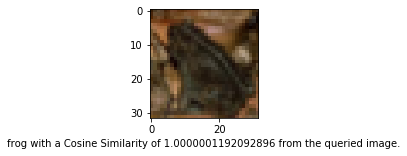

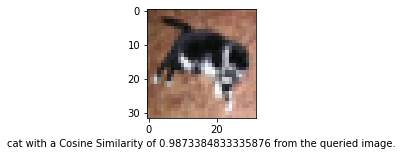

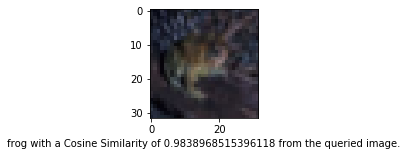

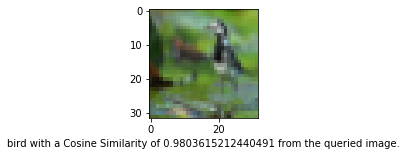

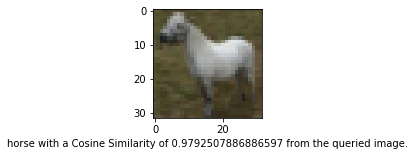

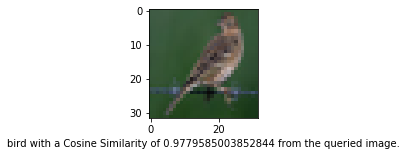

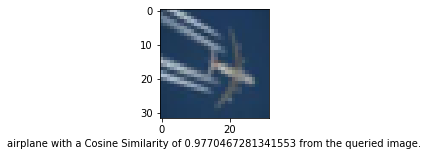

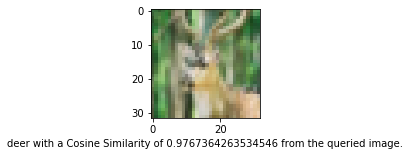

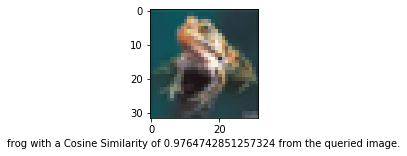

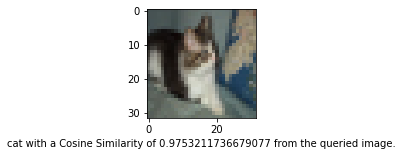

In [28]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [29]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [30]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance,Euclidean Distance
30,6,frog,0.000000,0.000000,0.0,0.086139,0.0,0.000000,0.000000,0.017919,...,0.000000,0.000000,0.030561,0.0,0.0,0.010626,0.0,1.000000,-1.192093e-07,0.000000
8324,3,cat,0.000000,0.000000,0.0,0.092160,0.0,0.000000,0.005147,0.036753,...,0.000000,0.000000,0.038325,0.0,0.0,0.000000,0.0,0.987338,1.266152e-02,0.054591
3707,6,frog,0.012622,0.000000,0.0,0.042991,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.020118,0.0,0.0,0.008617,0.0,0.983897,1.610315e-02,0.060246
1039,2,bird,0.005949,0.000000,0.0,0.094046,0.0,0.000000,0.000000,0.000000,...,0.000000,0.003167,0.000000,0.0,0.0,0.008784,0.0,0.980362,1.963848e-02,0.070744
2638,4,deer,0.019415,0.000000,0.0,0.059951,0.0,0.000000,0.000000,0.038724,...,0.000000,0.000000,0.000000,0.0,0.0,0.021955,0.0,0.976736,2.326357e-02,0.074036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3764,1,automobile,0.000000,0.979924,0.0,0.000000,0.0,0.681904,1.528992,0.222350,...,2.938343,0.919370,1.198080,0.0,0.0,0.000000,0.0,0.096723,9.032772e-01,8.037834
8470,8,ship,0.000000,1.223289,0.0,0.000000,0.0,1.340457,1.831604,0.000000,...,3.482750,1.146407,2.400291,0.0,0.0,0.000000,0.0,0.173246,8.267536e-01,8.176215
1895,8,ship,0.000000,1.153362,0.0,0.000000,0.0,1.454227,1.801088,0.000000,...,3.731234,1.196872,2.722844,0.0,0.0,0.000000,0.0,0.184717,8.152831e-01,8.212341
5449,1,automobile,0.000000,1.169084,0.0,0.000000,0.0,1.266114,1.854788,0.001355,...,3.403393,1.086589,2.089909,0.0,0.0,0.000000,0.0,0.151551,8.484488e-01,8.255671


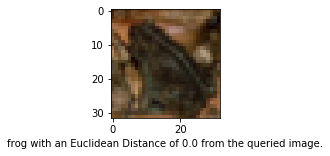

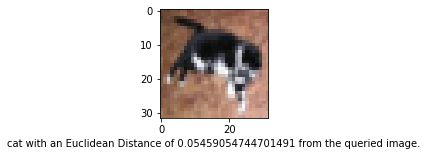

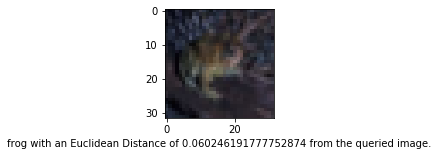

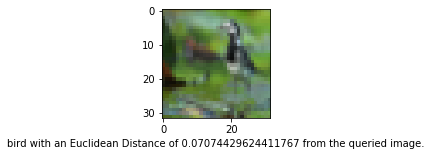

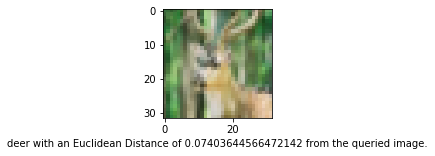

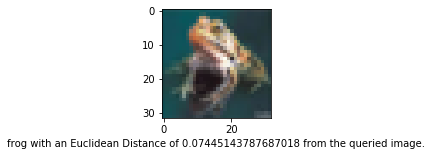

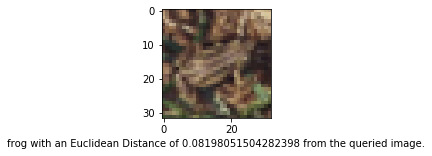

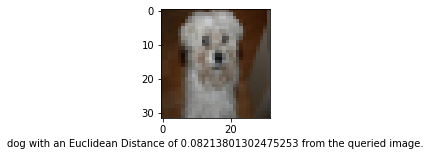

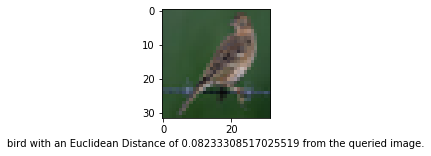

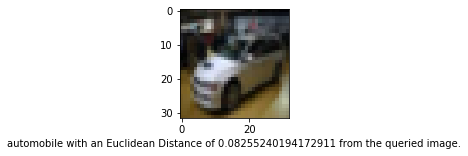

In [31]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()